Testing packing.py
January 15 2025 - Dan Espinosa

The general idea is to create the addresses and the packed clause representations to fill the clause table and address translation table with.
Am refactoring 



In [1]:
import packing as pck

In [12]:
# 4queens == p cnf 16 84
test_mems = pck.create_literal_memberships("4_queens.cnf")

In [14]:
#     Returns:
#       packed_literal_array: an array of the form [[[literal_a, literal_b], [membership of literal_a, membership of literal_b]], ...]
#       masks: a list of tuples indicating the start and end positions for each literal within the packed array (1-based indexing)

test_packs, test_masks = pck.packing_algorithm(test_mems)
print(test_masks)

[(0, 0), (11, 12), (24, 25), (37, 38), (50, 51), (61, 62), (72, 73), (83, 84), (94, 95), (105, 106), (116, 117), (127, 128), (138, 139), (149, 150), (160, 161), (171, 172), (173, 181), (162, 170), (151, 159), (140, 148), (129, 137), (39, 49), (26, 36), (118, 126), (107, 115), (13, 23), (0, 10), (96, 104), (85, 93), (74, 82), (63, 71), (52, 60)]


In [19]:
# Returns:
#     packed_literal_array: an array of the form [[[literal_a, literal_b], [membership of literal_a, membership of literal_b]], ...]
#     masks: a list of tuples indicating the start and end positions for each literal within the packed array (1-based indexing)

test_packs, test_masks = pck.packing_algorithm_20_as_max(test_mems)

In [20]:
# Convert packed literal array and masks to uint32 list format.
# Args:
# packed_literal_array (list): The packed literal array.
# masks (list): The masks indicating start and end positions.
# depth (int): The depth of the uint32 array.
# Returns:
# uint32_list (list): The uint32 list representation of packed literals.

# Example:
# literal address: 0x00 (depth = 2048 * 2 -> width = 12 bits)
# literal clause table membership address: 11'b00000000001
# literal clause table mask: 20b'11111000000000000000
# Then the resulting data stored in 0th index of the array would be
# 31'b00000000001_11111000000000000000 
uint32_packs = pck.convert_to_uint32_list(test_packs, test_masks)
print(uint32_packs)

<BarContainer object of 26 artists>

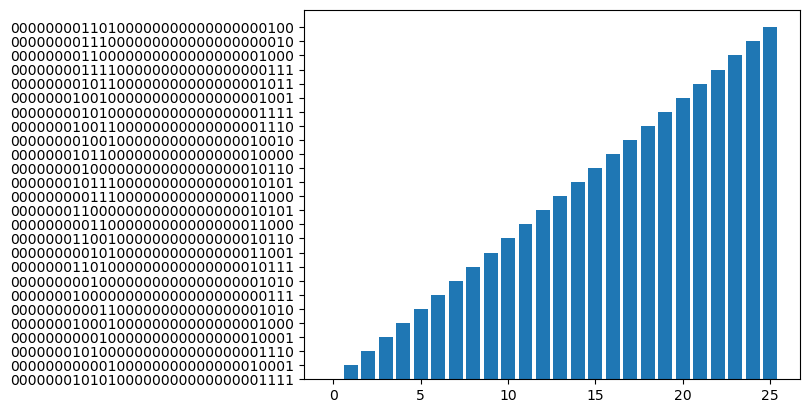

In [ ]:
import matplotlib.pyplot as plt
# literal address: 0x00 (depth = 2048 * 2 -> width = 12 bits)
# literal clause table membership address: 11'b00000000001
# literal clause table mask: 20b'11111000000000000000
# Then the resulting data stored in 0th index of the array would be
# 31'b00000000001_11111000000000000000 
plotter = [f"{i:032b}" for i in uint32_packs if i != 0] 
plt.bar(range(len(plotter)),plotter)

In [52]:
len(plotter[1])

32

In [50]:
import pytest

def test_packing_algorithm_normal_case():
    input_data = [[], [1, 2], [3, 4, 5], [6, 7], [8, 9, 10, 11]]
    expected_output = (
        [[[4, 2], [8, 9, 10, 11, 1, 2]], [[3, 1], [3, 4, 5, 6, 7]]],
        [(0, 0), (4, 5), (2, 3), (8, 9), (0, 3)]
    )
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_empty_input():
    input_data = [[]]
    expected_output = ([], [(0, 0)])
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_single_element():
    input_data = [[], [1, 2, 3]]
    expected_output = ([[[1], [1, 2, 3]]], [(0, 0), (0, 2)])
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_max_size_20():
    input_data = [[], [1]*20, [2, 3], [4, 5]]
    expected_output = (
        [[[1], [1]*20], [[3, 2], [2, 3, 4, 5]]],
        [(0, 0), (0, 19), (22, 23), (20, 21)]
    )
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_exceeds_max_size():
    input_data = [[], [1]*21, [2, 3]]
    with pytest.raises(ValueError):
        pck.packing_algorithm(input_data)

def test_packing_algorithm_all_elements_packed_separately():
    input_data = [[], [1]*20, [2]*20, [3]*20]
    expected_output = (
        [[[1], [1]*20], [[2], [2]*20], [[3], [3]*20]],
        [(0, 0), (0, 19), (20, 39), (40, 59)]
    )
    assert pck.packing_algorithm(input_data) == expected_output

# Tests for pck.packing_algorithm_20_as_max
def test_packing_algorithm_20_as_max_normal_case():
    input_data = [[], [1, 2], [3, 4, 5], [6, 7], [8, 9, 10, 11]]
    expected_output = (
        [[[4, 2], [8, 9, 10, 11, 1, 2]], [[3, 1], [3, 4, 5, 6, 7]]],
        [(0, 0), (4, 5), (2, 3), (8, 9), (0, 3)]
    )
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_empty_input():
    input_data = [[]]
    expected_output = ([], [(0, 0)])
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_single_element():
    input_data = [[], [1, 2, 3]]
    expected_output = ([[[1], [1, 2, 3]]], [(0, 0), (0, 2)])
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_max_size_20():
    input_data = [[], [1]*20, [2, 3], [4, 5]]
    expected_output = (
        [[[1], [1]*20], [[3, 2], [2, 3, 4, 5]]],
        [(0, 0), (0, 19), (22, 23), (20, 21)]
    )
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_exceeds_max_size():
    input_data = [[], [1]*21, [2, 3]]
    with pytest.raises(ValueError):
        pck.packing_algorithm_20_as_max(input_data)

def test_packing_algorithm_20_as_max_all_elements_packed_separately():
    input_data = [[], [1]*20, [2]*20, [3]*20]
    expected_output = (
        [[[1], [1]*20], [[2], [2]*20], [[3], [3]*20]],
        [(0, 0), (0, 19), (20, 39), (40, 59)]
    )
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output
